In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
! kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset --unzip

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
100% 148M/149M [00:05<00:00, 30.8MB/s]
100% 149M/149M [00:05<00:00, 27.8MB/s]


In [ ]:
def get_class_paths(path):
    classes = []
    class_paths = []

    # Iterate through directories in the training path
    for label in os.listdir(path):
        label_path = os.path.join(path, label)

        # Check if it's a directory
        if os.path.isdir(label_path):
            # Iterate through images in the label directory
            for image in os.listdir(label_path):
                image_path = os.path.join(label_path, image)

                # Add class and path to respective lists
                classes.append(label)
                class_paths.append(image_path)


    # Create a DataFrame with the collected data
    df = pd.DataFrame({"Class Path": class_paths, "Class": classes})

    return df

In [ ]:
tr_df = get_class_paths("/content/Training")

In [ ]:
tr_df

,Class Path,Class
0,/content/Training/glioma/Tr-gl_0763.jpg,glioma
1,/content/Training/glioma/Tr-gl_0108.jpg,glioma
2,/content/Training/glioma/Tr-gl_0861.jpg,glioma
3,/content/Training/glioma/Tr-glTr_0006.jpg,glioma
4,/content/Training/glioma/Tr-gl_0477.jpg,glioma
...,...,...
5707,/content/Training/notumor/Tr-no_1035.jpg,notumor
5708,/content/Training/notumor/Tr-no_1404.jpg,notumor
5709,/content/Training/notumor/Tr-no_0239.jpg,notumor
5710,/content/Training/notumor/Tr-no_0821.jpg,notumor


In [ ]:
ts_df = get_class_paths("/content/Testing")

In [ ]:
ts_df

,Class Path,Class
0,/content/Testing/glioma/Te-gl_0148.jpg,glioma
1,/content/Testing/glioma/Te-gl_0210.jpg,glioma
2,/content/Testing/glioma/Te-gl_0201.jpg,glioma
3,/content/Testing/glioma/Te-gl_0257.jpg,glioma
4,/content/Testing/glioma/Te-glTr_0003.jpg,glioma
...,...,...
1306,/content/Testing/notumor/Te-no_0116.jpg,notumor
1307,/content/Testing/notumor/Te-no_0179.jpg,notumor
1308,/content/Testing/notumor/Te-no_0292.jpg,notumor
1309,/content/Testing/notumor/Te-no_0281.jpg,notumor


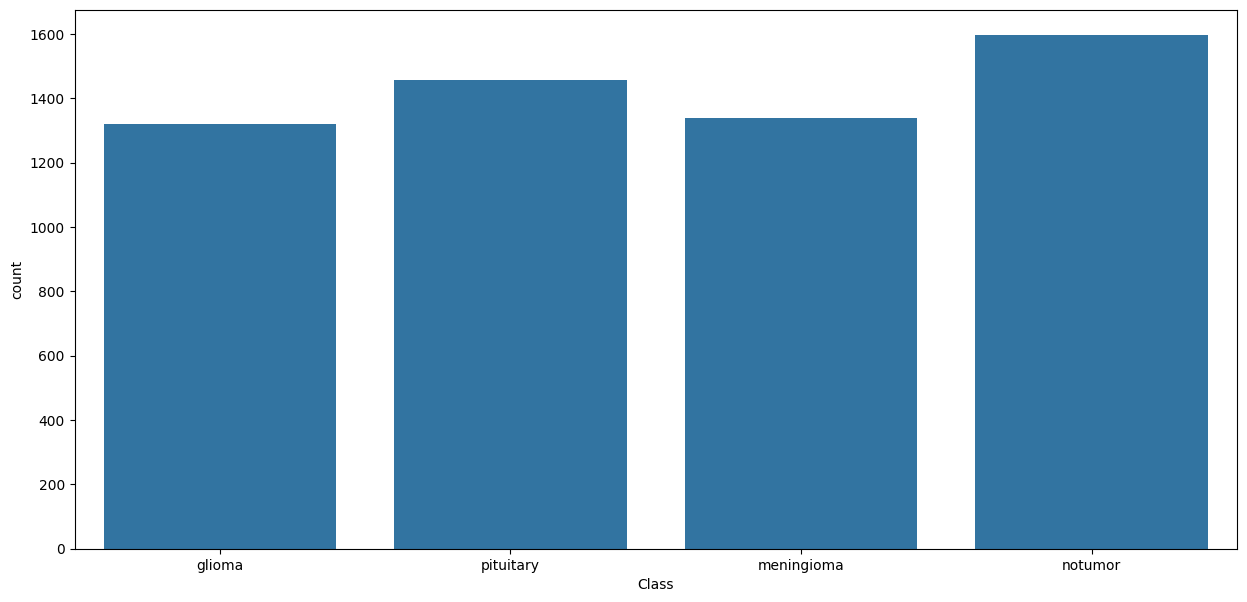

In [ ]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data=tr_df, x=tr_df['Class'])

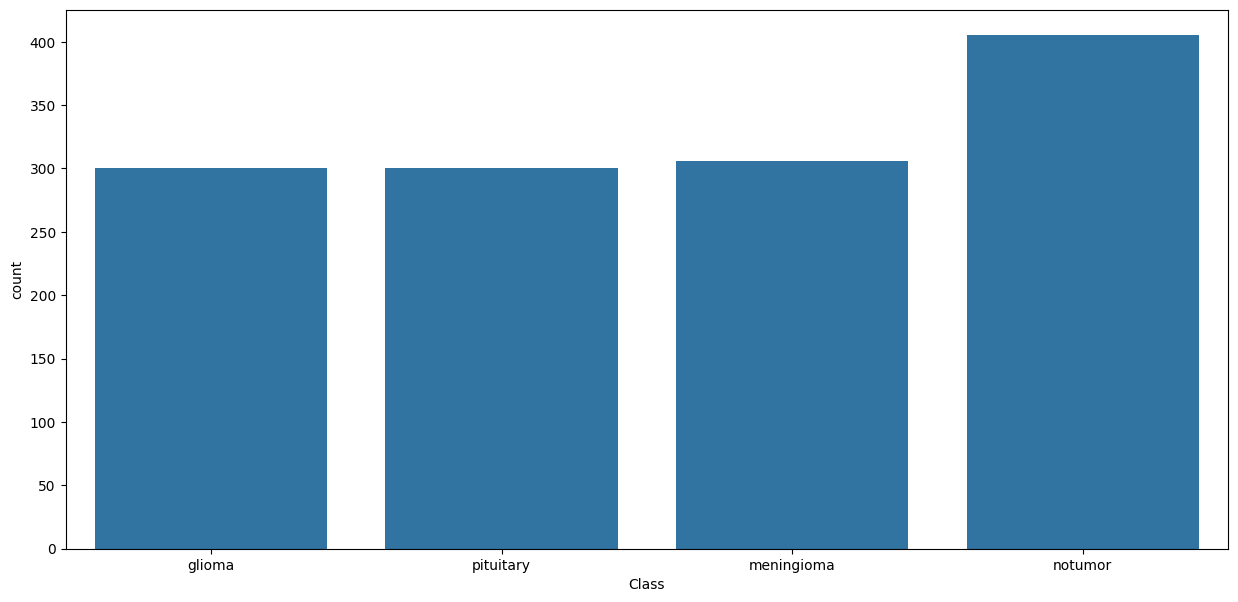

In [ ]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data=ts_df, x=ts_df['Class'])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
valid_df, ts_df = train_test_split(ts_df, train_size=0.5, stratify=ts_df['Class'])

In [ ]:
valid_df

,Class Path,Class
589,/content/Testing/pituitary/Te-pi_0064.jpg,pituitary
1141,/content/Testing/notumor/Te-no_0275.jpg,notumor
673,/content/Testing/meningioma/Te-me_0205.jpg,meningioma
809,/content/Testing/meningioma/Te-me_0029.jpg,meningioma
1290,/content/Testing/notumor/Te-no_0354.jpg,notumor
...,...,...
4,/content/Testing/glioma/Te-glTr_0003.jpg,glioma
7,/content/Testing/glioma/Te-gl_0068.jpg,glioma
823,/content/Testing/meningioma/Te-me_0265.jpg,meningioma
1197,/content/Testing/notumor/Te-no_0280.jpg,notumor


In [ ]:
ts_df

,Class Path,Class
1216,/content/Testing/notumor/Te-no_0337.jpg,notumor
209,/content/Testing/glioma/Te-gl_0152.jpg,glioma
181,/content/Testing/glioma/Te-gl_0027.jpg,glioma
61,/content/Testing/glioma/Te-gl_0245.jpg,glioma
920,/content/Testing/notumor/Te-no_0272.jpg,notumor
...,...,...
785,/content/Testing/meningioma/Te-me_0161.jpg,meningioma
350,/content/Testing/pituitary/Te-pi_0034.jpg,pituitary
1205,/content/Testing/notumor/Te-no_0369.jpg,notumor
161,/content/Testing/glioma/Te-gl_0208.jpg,glioma


In [ ]:
batch_size = 32

img_size = (299, 299)

image_generator  = ImageDataGenerator(rescale=1/255, brightness_range=(0.9, 1.2))

ts_gen = ImageDataGenerator(rescale=1/255)

In [ ]:
tr_gen = image_generator.flow_from_dataframe(tr_df, x_col='Class Path',
                                             y_col='Class',
                                             batch_size=batch_size,
                                             target_size=img_size)

valid_gen = image_generator.flow_from_dataframe(valid_df, x_col='Class Path',
                                             y_col='Class',
                                             batch_size=batch_size,
                                             target_size=img_size)

ts_gen = ts_gen.flow_from_dataframe(ts_df, x_col='Class Path',
                                             y_col='Class',
                                             batch_size=16,
                                             target_size=img_size, shuffle=False)



Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


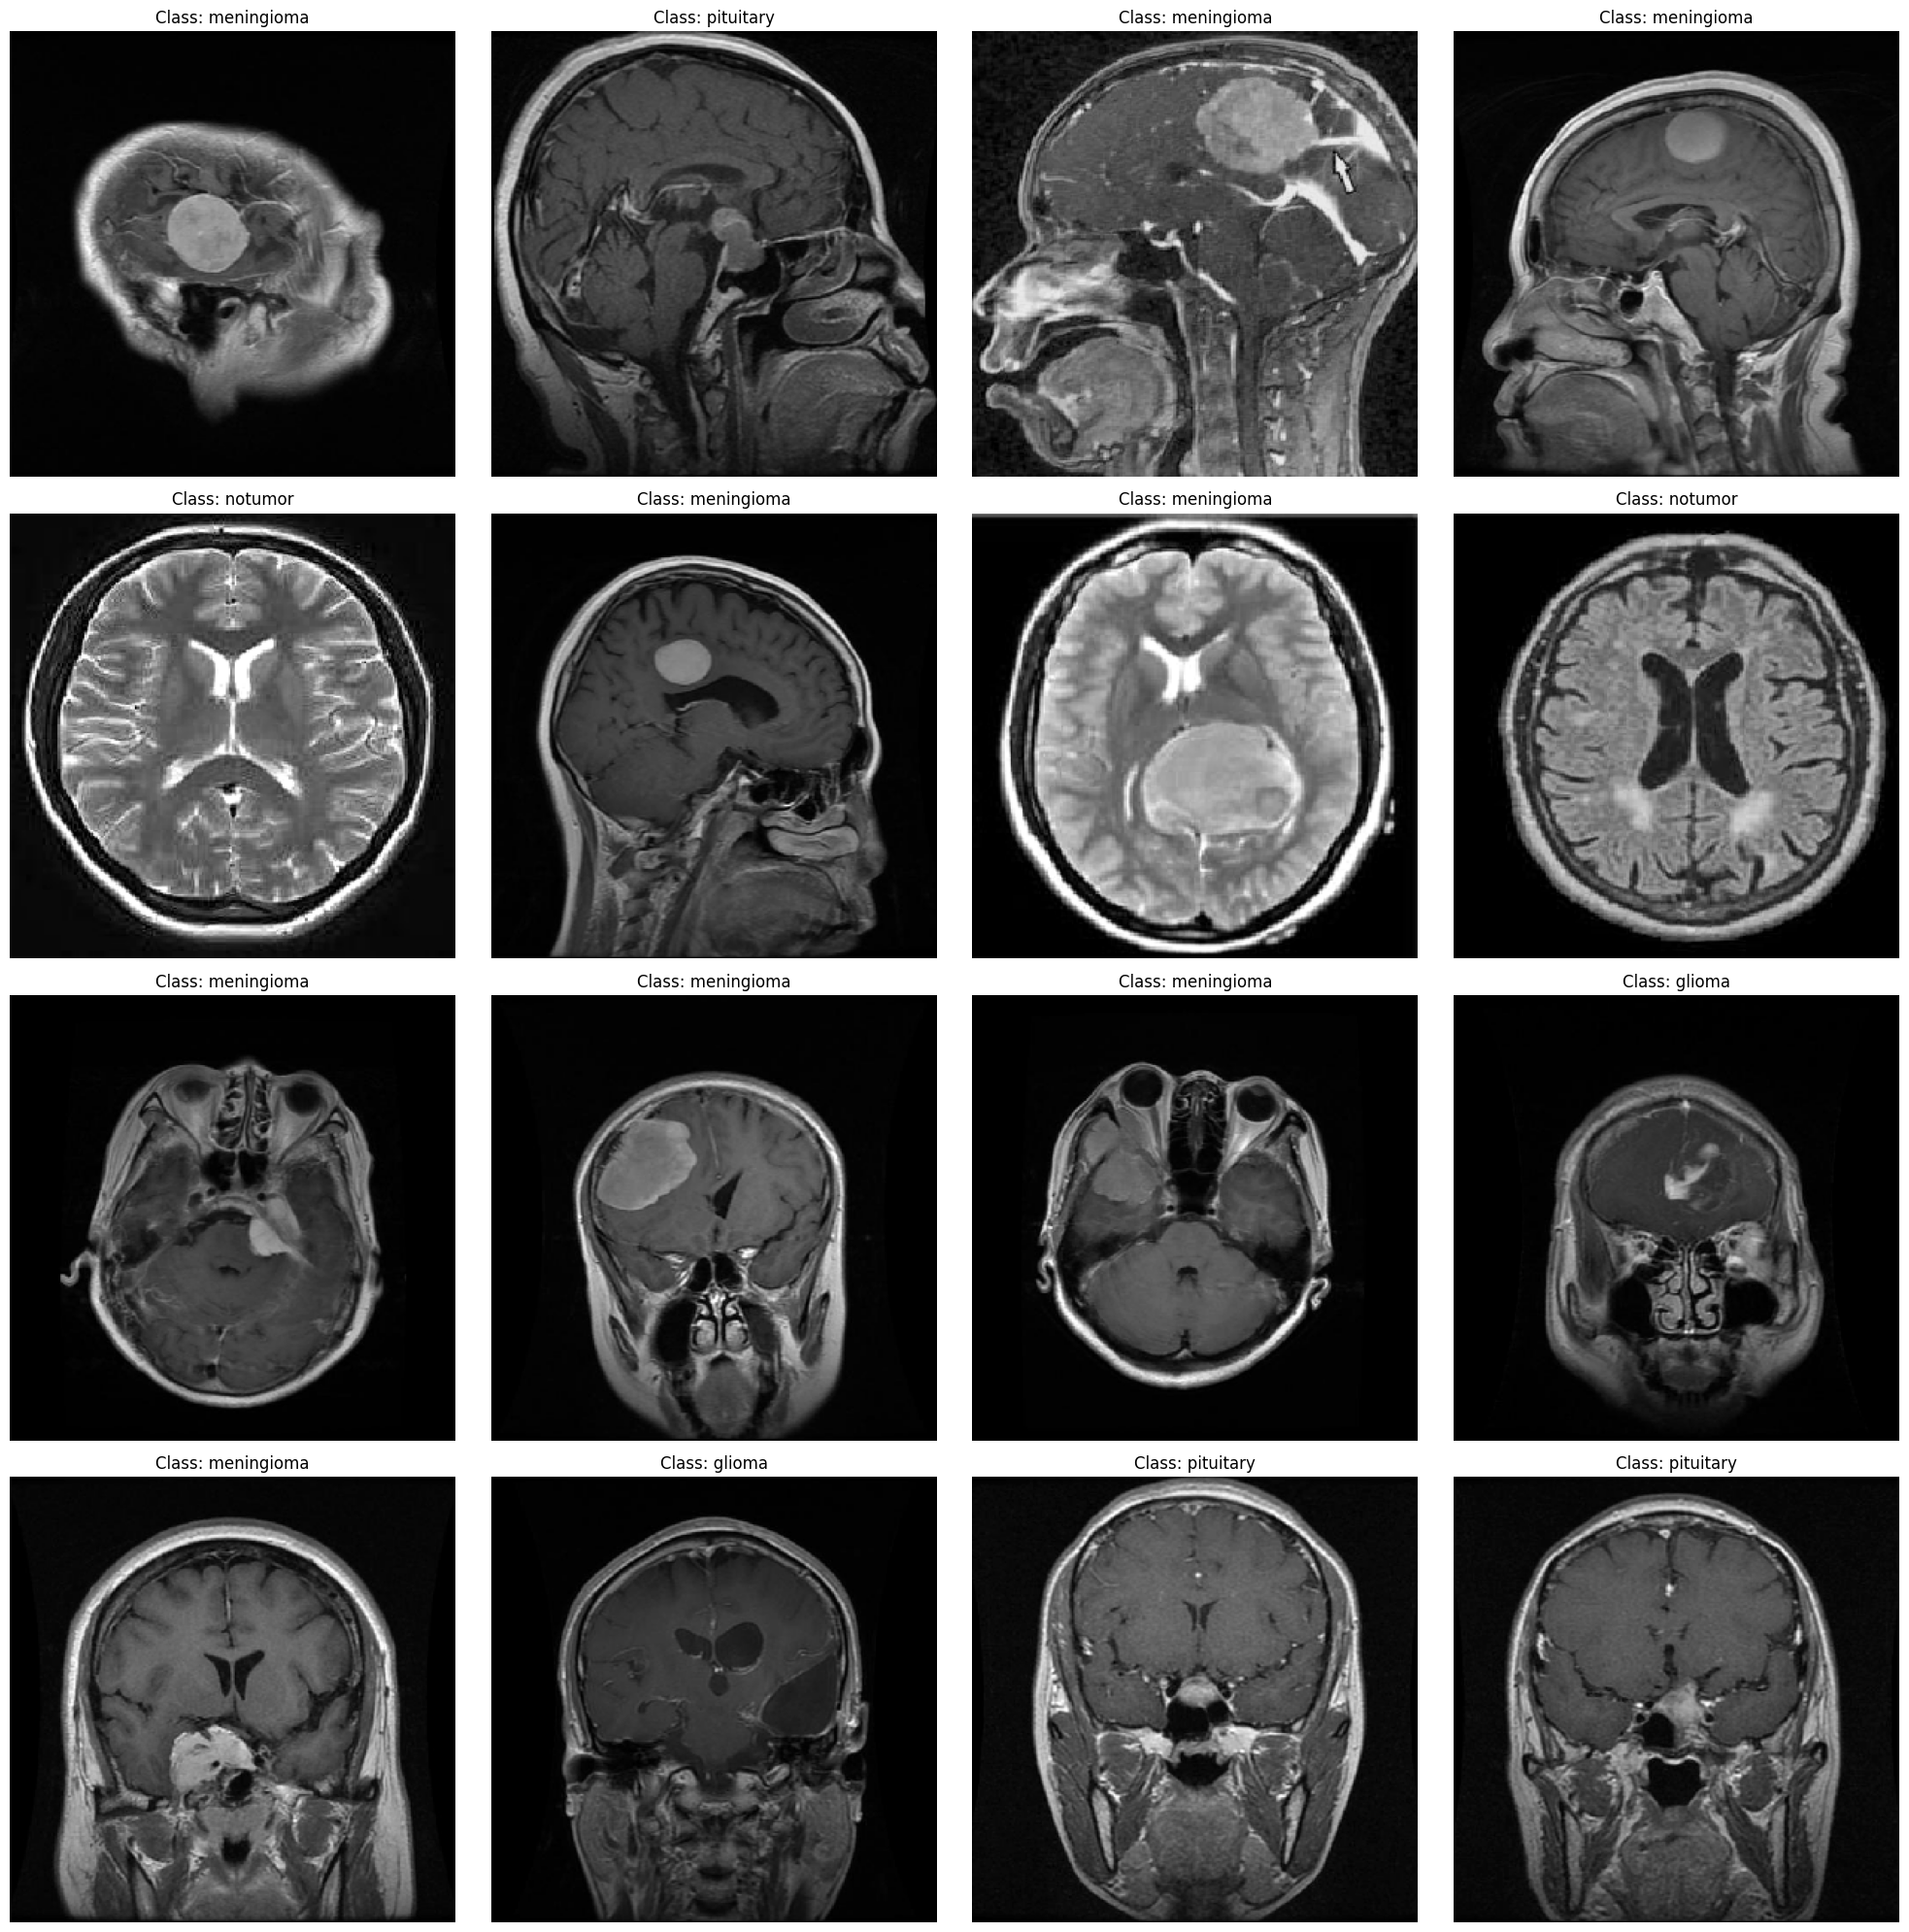

In [ ]:
plt.figure(figsize=(20, 20))
for i in range(16):
  plt.subplot(4, 4, i+1)
  batch = next(tr_gen)
  image = batch[0][0]
  label = batch[1][0]
  plt.imshow(image)

  # Get the class index
  class_index = np.argmax(label)

  # Get the list of class names and class indices
  class_names = list(tr_gen.class_indices.keys())
  class_indices = list(tr_gen.class_indices.values())

  # Find the index of the class_index in the list of indices
  index_position = class_indices.index(class_index)

  # Get the class name using the index position
  class_name = class_names[index_position]

  plt.title(f"Class: {class_name}")
  plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
img_shape = (299, 299, 3)

base_model = tf.keras.applications.Xception(include_top=False,
                                            weights= "imagenet",
                                            input_shape= img_shape,
                                            pooling= 'max')

model = Sequential([
    base_model,
    Flatten(),
    Dropout(rate= 0.3),
    Dense(128, activation= 'relu'),
    Dropout(rate= 0.25),
    Dense(4, activation= 'softmax')
])

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:
model.compile(Adamax(learning_rate= 0.001),
              loss= 'categorical_crossentropy',
              metrics= ['accuracy',
              Precision(),
              Recall()])

In [ ]:
hist = model.fit(tr_gen, epochs=5, validation_data=valid_gen)

Epoch 1/5


KeyboardInterrupt: 

In [ ]:
hist.history.keys()

NameError: name 'hist' is not defined

In [ ]:
# Get training and validation metrics from history
metrics = ['accuracy', 'loss', 'precision', 'recall']
tr_metrics = {m: hist.history[m] for m in metrics}
val_metrics = {m: hist.history[f'val_{m}'] for m in metrics}

# Find best epochs and values
best_epochs = {}
best_values = {}
for m in metrics:
  if m == 'loss':
    idx = np.argmin(val_metrics[m])
  else:
    idx = np.argmax(val_metrics[m])
  best_epochs[m] = idx + 1
  best_values[m] = val_metrics[m][idx]

# Plot metrics
plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')

for i, metric in enumerate(metrics, 1):
  plt.subplot(2, 2, i)
  epochs = range(1, len(tr_metrics[metric]) + 1)

  plt.plot(epochs, tr_metrics[metric], 'r', label=f'Training {metric}')
  plt.plot(epochs, val_metrics[metric], 'g', label=f'Validation {metric}')
  plt.scatter(best_epochs[metric], best_values[metric], s=150, c='blue',
              label=f'Best epoch = {best_epochs[metric]}')

  plt.title(f'Training and Validation {metric.title()}')
  plt.xlabel('Epochs')
  plt.ylabel(metric.title())
  plt.legend()
  plt.grid(True)

plt.suptitle('Model Training Metrics Over Epochs', fontsize=16)
plt.show()

NameError: name 'hist' is not defined

In [ ]:
train_score = model.evaluate(tr_gen, verbose=1)
valid_score = model.evaluate(valid_gen, verbose=1)
test_score = model.evaluate(ts_gen, verbose=1)

print(f"Train Accuracy: {train_score[1]*100:.2f}%")
print(f"Train Loss: {train_score[0]:.4f}")
print(f"\n\nValidation Accuracy: {valid_score[1]*100:.2f}%")
print(f"Validation Loss: {valid_score[0]:.4f}")
print(f"\n\nTest Accuracy: {test_score[1]*100:.2f}%")
print(f"Test Loss: {test_score[0]:.4f}")

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  3/179 ━━━━━━━━━━━━━━━━━━━━ 38:22 13s/step - accuracy: 0.2344 - loss: 2.2909 - precision: 0.2547 - recall: 0.1979

KeyboardInterrupt: 

In [ ]:
preds = model.predict(ts_gen)
y_pred = np.argmax(preds, axis=1)

class_dict = {
    0: 'glioma',
    1: 'meningioma',
    2: 'no_tumor',
    3: 'pituitary'
}

# Then create and display the confusion matrix
cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

 1/41 ━━━━━━━━━━━━━━━━━━━━ 4:39 7s/step

KeyboardInterrupt: 

In [ ]:
from PIL import Image

def predict(img_path: str) -> None:
  # Get class labels
  labels = list(class_dict.keys())

  # Create figure
  plt.figure(figsize=(6, 8))

  # Load and preprocess image
  img = Image.open(img_path)
  resized_img = img.resize((299, 299))
  img_array = np.asarray(resized_img)
  img_array = np.expand_dims(img_array, axis=0) / 255.0

  # Get model predictions
  predictions = model.predict(img_array)
  probabilities = list(predictions[0])

  # Get predicted class
  predicted_class_idx = np.argmax(probabilities)
  predicted_class = class_dict[predicted_class_idx]

  # Plot original image
  plt.subplot(2, 1, 1)
  plt.imshow(resized_img)
  plt.title(f"Input MRI Image\nPredicted: {predicted_class}")

  #Plot prediction probabilities
  plt.subplot(2, 1, 2)
  bars = plt.barh(labels, probabilities)
  plt.xlabel("Probability", fontsize=15)
  plt.title("Class Probabilities")

  # Add probability labels to bars
  ax = plt.gca()
  ax.bar_label(bars, fmt="%.2f")

  plt.tight_layout()
  plt.show()

  print(f"\nPredicted tumor type: {predicted_class}")

In [ ]:
predict("/content/Testing/meningioma/Te-meTr_0000.jpg")

NameError: name 'class_dict' is not defined

In [ ]:
predict("/content/Testing/meningioma/Te-meTr_0005.jpg")


In [ ]:
predict("/content/Testing/glioma/Te-glTr_0000.jpg")

In [ ]:
predict("/content/Testing/glioma/Te-glTr_0009.jpg")

In [ ]:
model.save_weights("xception_models.weights.h5")

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import regularizers

In [ ]:
batch_size = 16

img_size = (224, 224)

image_generator  = ImageDataGenerator(rescale=1/255, brightness_range=(0.9, 1.2))

ts_gen = ImageDataGenerator(rescale=1/255)

tr_gen = image_generator.flow_from_dataframe(tr_df, x_col='Class Path',
                                             y_col='Class',
                                             batch_size=batch_size,
                                             target_size=img_size)

valid_gen = image_generator.flow_from_dataframe(valid_df, x_col='Class Path',
                                             y_col='Class',
                                             batch_size=batch_size,
                                             target_size=img_size)

ts_gen = ts_gen.flow_from_dataframe(ts_df, x_col='Class Path',
                                             y_col='Class',
                                             batch_size=16,
                                             target_size=img_size, shuffle=False)


In [ ]:
# Create a Sequential model

cnn_model = Sequential()

# Convolutional layers
cnn_model.add(Conv2D(512, (3,3), padding='same', input_shape=(224, 224, 3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

cnn_model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten the output for fully connected layers
cnn_model.add(Flatten())

# Fully connected layers
cnn_model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
cnn_model.add(Dropout(0.35))

cnn_model.add(Dense(4, activation='softmax')) # Output layer with 4 neurons for the 4 classes

# Compile the model
cnn_model.compile(Adamax(learning_rate = 0.001), loss='categorical_crossentropy', metrics=['accuracy', Precision(), Recall()])

# Display the model summary
cnn_model.summary()

In [ ]:
history = cnn_model.fit(tr_gen, epochs=5, validation_data=valid_gen)

In [ ]:
history.history.keys()

In [ ]:
# Get training and validation metrics from history
metrics = ['accuracy', 'loss', 'precision_1', 'recall_1']
tr_metrics = {m: history.history[m] for m in metrics}
val_metrics = {m: history.history[f'val_{m}'] for m in metrics}

# Find best epochs and values
best_epochs = {}
best_values = {}
for m in metrics:
  if m == 'loss':
    idx = np.argmin(val_metrics[m])
  else:
    idx = np.argmax(val_metrics[m])
  best_epochs[m] = idx + 1
  best_values[m] = val_metrics[m][idx]

# Plot metrics
plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')

for i, metric in enumerate(metrics, 1):
  plt.subplot(2, 2, i)
  epochs = range(1, len(tr_metrics[metric]) + 1)

  plt.plot(epochs, tr_metrics[metric], 'r', label=f'Training {metric}')
  plt.plot(epochs, val_metrics[metric], 'g', label=f'Validation {metric}')
  plt.scatter(best_epochs[metric], best_values[metric], s=150, c='blue',
              label=f'Best epoch = {best_epochs[metric]}')

  plt.title(f'Training and Validation {metric.title()}')
  plt.xlabel('Epochs')
  plt.ylabel(metric.title())
  plt.legend()
  plt.grid(True)

plt.suptitle('Model Training Metrics Over Epochs', fontsize=16)
plt.show()

In [ ]:
train_score = cnn_model.evaluate(tr_gen, verbose=1)
valid_score = cnn_model.evaluate(valid_gen, verbose=1)
test_score = cnn_model.evaluate(ts_gen, verbose=1)

print(f"Train Accuracy: {train_score[1]*100:.2f}%")
print(f"Train Loss: {train_score[0]:.4f}")
print(f"\n\nValidation Accuracy: {valid_score[1]*100:.2f}%")
print(f"Validation Loss: {valid_score[0]:.4f}")
print(f"\n\nTest Accuracy: {test_score[1]*100:.2f}%")
print(f"Test Loss: {test_score[0]:.4f}")

NameError: name 'cnn_model' is not defined

In [ ]:
preds = cnn_model.predict(ts_gen)
y_pred = np.argmax(preds, axis=1)

class_dict = {
    0: 'glioma',
    1: 'meningioma',
    2: 'no_tumor',
    3: 'pituitary'
}

# Then create and display the confusion matrix
cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
clr = classification_report(ts_gen.classes, y_pred)
print(clr)

NameError: name 'y_pred' is not defined

In [ ]:
cnn_model.save("cnn_model.h5")

NameError: name 'cnn_model' is not defined

In [ ]:
! pip install streamlit pyngrok python-dotenv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 54.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 93.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.5 MB/s eta 0:00:00


In [ ]:
from threading import Thread
from pyngrok import ngrok
from google.colab import userdata

In [ ]:
ngrok_token = userdata.get('NGROK_AUTH_TOKEN')

ngrok.set_auth_token(ngrok_token)

In [ ]:
def run_streamlit():
  os.system("streamlit run /content/app.py --server.port 0501")

In [66]:
%%writefile app.py

import streamlit as st
import tensorflow as tf
import numpy as np
import plotly.graph_objects as go
import cv2
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
import google.generativeai as genai
import PIL.Image
import os
from google.colab import userdata
from dotenv import load_dotenv

load_dotenv()
genai.configure(api_key=os.getenv("GOOGLE_API_KEY"))

output_dir = 'saliency_maps'
os.makedirs(output_dir, exist_ok=True)

def generate_explanation(img_path, model_prediction, confidence):
    prompt = f"""
    You are an expert neurologist. You are tasked with explaining a saliency map of a brain tumor MRI scan.
    The saliency map was generated by a deep learning model trained to classify brain tumors
    as either glioma, meningioma, pituitary, or no tumor.

    The model predicted the image to be of class '{model_prediction}' with a confidence of {confidence * 100}%.

    Provide a concise explanation (4 sentences max):
    - Discuss what regions of the brain the model focused on based on the saliency map.
    - Suggest possible reasons for the model's prediction.
    """

    img = PIL.Image.open(img_path)

    model = genai.GenerativeModel(model_name="gemini-1.5-flash")
    response = model.generate_content([prompt, img])

    return response.text

def generate_saliency_map(model, img_array, class_index, img_size):
    with tf.GradientTape() as tape:
        img_tensor = tf.convert_to_tensor(img_array)
        tape.watch(img_tensor)
        predictions = model(img_tensor)
        target_class = predictions[:, class_index]
    gradients = tape.gradient(target_class, img_tensor)
    gradients = tf.math.abs(gradients)
    gradients = tf.reduce_max(gradients, axis=-1)
    gradients = gradients.numpy().squeeze()

    # Resize gradients to match original image size
    gradients = cv2.resize(gradients, img_size)

    # Apply a circular mask
    center = (gradients.shape[0] // 2, gradients.shape[1] // 2)
    radius = min(center[0], center[1]) - 10
    y, x = np.ogrid[:gradients.shape[0], :gradients.shape[1]]
    mask = (x - center[0])**2 + (y - center[1])**2 <= radius**2

    gradients = gradients * mask

    # Normalize and apply thresholds
    brain_gradients = gradients[mask]
    if brain_gradients.max() > brain_gradients.min():
        brain_gradients = (brain_gradients - brain_gradients.min()) / (brain_gradients.max() - brain_gradients.min())
    gradients[mask] = brain_gradients

    gradients[gradients < np.percentile(gradients[mask], 80)] = 0
    gradients = cv2.GaussianBlur(gradients, (11, 11), 0)

    # Generate heatmap
    heatmap = cv2.applyColorMap(np.uint8(255 * gradients), cv2.COLORMAP_JET)
    heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)

    return heatmap

def load_xception_model(model_path):
    img_shape = (299, 299, 3)
    base_model = tf.keras.applications.Xception(
        include_top=False, weights="imagenet", input_shape=img_shape, pooling='max'
    )
    model = Sequential([
        base_model,
        Flatten(),
        Dropout(rate=0.3),
        Dense(128, activation='relu'),
        Dropout(rate=0.25),
        Dense(4, activation='softmax')
    ])
    model.build((None,) + img_shape)
    model.compile(
        Adamax(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy', Precision(), Recall()]
    )
    model.load_weights(model_path)
    return model

# Streamlit app
st.title("Brain Tumor Classification")
st.write("Upload an MRI scan to classify.")

uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "jpeg", "png"])

if uploaded_file:
    selected_model = st.radio(
        "Select Model",
        ("Transfer Learning - Xception", "Custom CNN")
    )

    if selected_model == "Transfer Learning - Xception":
        model = load_xception_model('/content/xception_model.weights.h5')
        img_size = (299, 299)
    else:
        model = load_model('/content/cnn_model.h5')
        img_size = (224, 224)

    labels = ['Glioma', 'Meningioma', 'No tumor', 'Pituitary']
    img = image.load_img(uploaded_file, target_size=img_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    prediction = model.predict(img_array)
    class_index = np.argmax(prediction[0])
    result = labels[class_index]

    st.write(f"Predicted Class: {result}")
    st.write("Prediction Probabilities:")
    for label, prob in zip(labels, prediction[0]):
        st.write(f"{label}: {prob:.4%}")

    saliency_map = generate_saliency_map(model, img_array, class_index, img_size)

    col1, col2 = st.columns(2)
    with col1:
        st.image(uploaded_file, caption='Uploaded Image', use_column_width=True)
    with col2:
        st.image(saliency_map, caption='Saliency Map', use_column_width=True)

    saliency_map_path = os.path.join(output_dir, uploaded_file.name)
    with open(saliency_map_path, "wb") as f:
        f.write(uploaded_file.getbuffer())

    explanation = generate_explanation(saliency_map_path, result, prediction[0][class_index])

    st.write("## Explanation")
    st.write(explanation)

    # Visualization with Plotly
    probabilities = prediction[0]
    sorted_indices = np.argsort(probabilities)[::-1]
    sorted_labels = [labels[i] for i in sorted_indices]
    sorted_probabilities = probabilities[sorted_indices]

    fig = go.Figure(go.Bar(
        x=sorted_probabilities,
        y=sorted_labels,
        orientation='h',
        marker_color=['red' if label == result else 'blue' for label in sorted_labels]
    ))

    fig.update_layout(
        title='Class Probabilities',
        xaxis_title='Probability',
        yaxis_title='Class',
        yaxis=dict(autorange="reversed")
    )

    st.plotly_chart(fig)

Overwriting app.py


In [62]:
thread = Thread(target=run_streamlit)
thread.start()

In [63]:
public_url = ngrok.connect(addr="0501", proto="http", bind_tls=True)
print("Public URL", public_url)

Public URL NgrokTunnel: "https://974c-104-199-141-135.ngrok-free.app" -> "http://localhost:0501"


In [55]:
tunnels = ngrok.get_tunnels()
for tunnel in tunnels:
  print(f"Closing tunnel: {tunnel.public_url} =>{tunnel.config['addr']}")
  ngrok.disconnect(tunnel.public_url)

Closing tunnel: https://039a-104-199-141-135.ngrok-free.app =>http://localhost:0501
Closing tunnel: https://7bde-104-199-141-135.ngrok-free.app =>http://localhost:0501


Closing tunnel: https://dd93-104-199-141-135.ngrok-free.app =>http://localhost:0501
